In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [400]:
dejong = lambda x: np.sum(x**2)
rastrigin = lambda x: 10*len(x) + np.sum( x**2 - 10 * np.cos(2*np.pi*x) )
rastrigin = lambda x: 10*len(x) + np.sum( np.array(x)**2 - 10 * np.cos(2*np.pi*np.array(x)) )
ackley = lambda x: -20. * np.exp(-1/5 * np.sqrt(1/len(x) * np.sum(np.power(x,2)))) - np.exp(1/len(x) * np.sum(np.cos(2*np.pi*x))) + 20. + np.e

In [370]:
from scipy.stats import truncnorm
import numpy as np
import matplotlib.pyplot as plt

def innovative_gunner(obj_func, xmin, xmax, alpha_max = np.pi/2, beta_max = np.pi/2, num_dimensions = 1, num_iterations = 10, popsize = 10, angle_adjuster=None, 
                      visualisation=False):
    """
    Performs Innovative Gunner Algorithm (AIG) on specified obj_func function:

    Args:
        obj_func: Objective function to minimize
        xmin: Minimum value allowed for x 
        xmax: Maximum value allowed for x
        alpha_max: Controls the allowed value for random alpha angle in angle adjustements: alpha is random <-alpha-max ; alpha_max > with normal distribution where sigma = alpha_max/3
        beta_max: Controls the allowed value for random beta angle in angle adjustements: beta is random <-beta-max ; beta_max > with normal distribution where sigma = beta_max/3
        num_dimensions: Number of objective function dimensions
        num_iterations: Number of iterations = Number of salvos
        popsize: Size of population = Number of gunners
        angle_adjuster: Function to adjust max angle. Accepts iteration number and max angle value, return new max angle value
        visualisation: True/False visualise convergence
    """
    
    #Initialize variables
    x = np.empty([popsize,num_dimensions])
    obj_sum_values = []
    obj_min_values = []
    pops = []
    if angle_adjuster == None : angle_adjuster = lambda angle_max, niter: angle_max

    #Random initialization of gun angles
    for i in range(popsize):
        if (num_dimensions > 1):
            for j in range(num_dimensions):
                x[i][j] = xmin + np.random.normal() * (xmax-xmin)
        else:
            x[i] = xmin + np.random.normal() * (xmax-xmin)

    #First evaluation = observe where shell lands
    y = [obj_func(np.array(x[i])) for i in range(popsize)]
    obj_min = np.min(y)
    obj_minarg = x[np.argmin(y)]

    for iter in range(num_iterations):
        #Modify x = adjust gun angles
        for pos, val in np.ndenumerate(x):
            alpha = truncnorm.rvs((-alpha_max)/(alpha_max/3), alpha_max/(alpha_max/3), loc=0, scale= alpha_max/3)
            beta  = truncnorm.rvs((-alpha_max)/(alpha_max/3), alpha_max/(alpha_max/3), loc=0, scale= alpha_max/3)
            x[pos] = val * alpha * beta

        #Evaluate population = fire and observe
        y = [obj_func(np.array(x[i])) for i in range(popsize)]
        iter_obj_min = np.min(y)

        #Save new best results
        if (iter_obj_min < obj_min):
            obj_min = iter_obj_min
            obj_minarg = x[np.argmin(y)]

        #Adjust max angles = Aim more precisely in next iteration
        alpha_max = angle_adjuster(alpha_max , iter)
        beta_max  = angle_adjuster(beta_max  , iter)

        #Save data for visualizations
        obj_sum_values.append(np.sum(y))
        obj_min_values.append(obj_min)  
        pops.append(x)

    return obj_minarg, obj_min, obj_sum_values, obj_min_values, pops

Najlepszy wynik AIG 0.0
Najlepszy wynik PSO 5.944420094350733
Najlepszy wynik HS 22.84823687389104
Iteration 0, Temperature 10.000, Best Evaluation 200.08357
Iteration 100, Temperature 0.099, Best Evaluation 105.82104
Iteration 200, Temperature 0.050, Best Evaluation 96.79498
Iteration 300, Temperature 0.033, Best Evaluation 96.76572
Iteration 400, Temperature 0.025, Best Evaluation 96.64388
Iteration 500, Temperature 0.020, Best Evaluation 96.64167
Iteration 600, Temperature 0.017, Best Evaluation 96.59051
Iteration 700, Temperature 0.014, Best Evaluation 96.53679
Iteration 800, Temperature 0.012, Best Evaluation 96.53679
Iteration 900, Temperature 0.011, Best Evaluation 96.53679


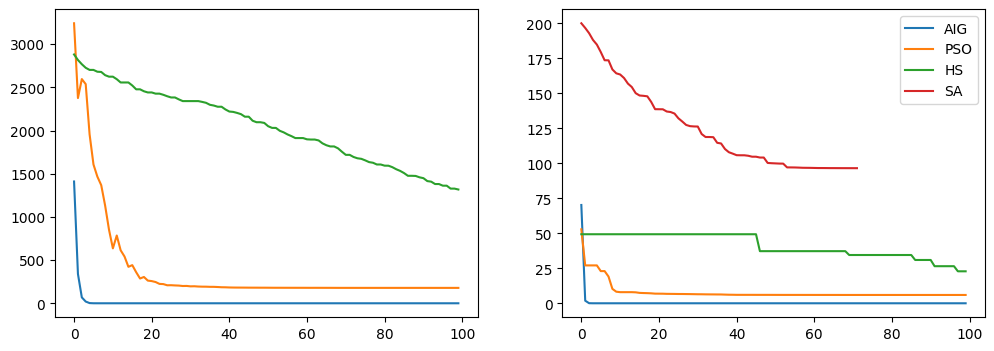

In [ ]:
import importlib
import gfg_sa
importlib.reload(gfg_sa)

from ai_pso import pso
from ai_hs import harmony_search
from gfg_sa import simulated_annealing



funcs = [dejong, rastrigin, ackley]
lims = [100., 5.12, 32.768]

id = 1
func = funcs[id]
xmax = lims[id]
xmin = -xmax

niter = 100

fig, axs = plt.subplots(1,2, figsize=(12,4))
ax1 = axs[0]
ax2 = axs[1]

obj_minarg, obj_min, sum_vals, best_vals, pops = innovative_gunner(func, xmin, xmax, num_dimensions=10, num_iterations=niter, popsize=10)
print(f'Najlepszy wynik AIG {obj_min}')
ax1.plot(sum_vals, label = "AIG")
ax2.plot(best_vals, label = "AIG")

sum_vals, best_vals = pso(func, num_dimensions=10, num_iterations=niter, num_particles=30)
print(f'Najlepszy wynik PSO {min(best_vals)}')
ax1.plot(sum_vals, label = "PSO")
ax2.plot(best_vals, label = "PSO")

sum_vals, best_vals = harmony_search(func, num_dimensions=10, num_iterations=niter, num_harmonies=30)
print(f'Najlepszy wynik HS {min(best_vals)}')
ax1.plot(sum_vals, label = "HS")
ax2.plot(best_vals, label = "HS")


bounds = [(xmin, xmax) for _ in range(10)]  # for a 2-dimensional Rastrigin function
n_iterations = 1000
step_size = 0.1
temp = 10
best, score, scores = simulated_annealing(func, bounds, n_iterations, step_size, temp)
ax2.plot(scores, label = "SA")

plt.legend()
plt.show()